In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/meat-consumption/meat_consumption.csv


In [2]:
#Read the data into datafarme
data = pd.read_csv('/kaggle/input/meat-consumption/meat_consumption.csv')
data.head()

,location,indicator,subject,measure,frequency,time,value
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.000004
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.808401
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.278166
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.244478
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.541244


In [3]:
# lets chek shape of the data
data.shape

(12140, 7)

In [4]:
# lets check whether we have any missing value in the data
data.isna().sum()

location     0
indicator    0
subject      0
measure      0
frequency    0
time         0
value        0
dtype: int64

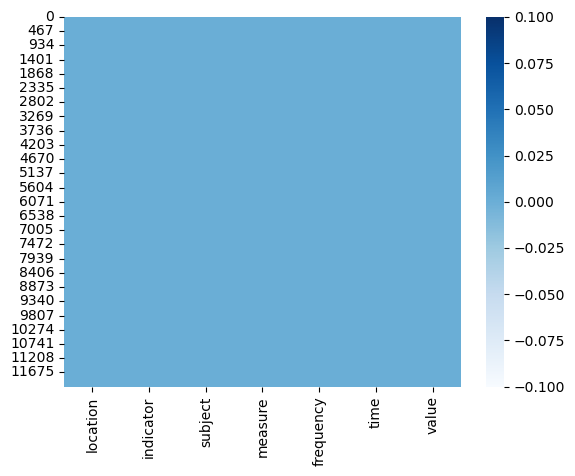

In [5]:
# Check missing values through plot
sns.heatmap(data=data.isna(), cmap='Blues')
plt.show()

As Not a Single value is missing in the data

In [6]:
# lets check the column type of each data column in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   12140 non-null  object 
 1   indicator  12140 non-null  object 
 2   subject    12140 non-null  object 
 3   measure    12140 non-null  object 
 4   frequency  12140 non-null  object 
 5   time       12140 non-null  int64  
 6   value      12140 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 664.0+ KB


In [7]:
# Need to convert location to string
data['location'] = data['location'].astype(str)
data['time'] = data['time'].astype(str)

In [8]:
# Lets check if there any duplicate value sin the dataset
data.duplicated().any()

False

## **In Which Year Most Meat was Consumed**

In [9]:
# get the data
data_year = data.groupby(['time']).sum()['value'].round(2).reset_index()
data_year.sort_values(by='value', ascending=False, inplace=True)
data_year['time'] = data_year['time'].astype(str)
data_year = data_year.head(20)
data_year.head()

,time,value
38,2028,947789.04
37,2027,939337.20
36,2026,930990.40
35,2025,922567.45
34,2024,914282.67


In [10]:
# Year in which most meat is consumed
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=data_year['time'], y=data_year['value'], text=data_year['value'], textposition='inside')])
fig.update_layout(title='Meat Consmption by Year', xaxis_title='Year', yaxis_title='Meat Consumption')
fig.update_traces(marker_color='rgb(153, 51, 102)', marker_line_color='rgb(26, 0, 13)',
                  marker_line_width=1.5)
fig.show()

we can clealry see that meat consumption is increasing every year

## **Which country have Most Meat Consumption in the Year 2023**

In [11]:
# first we have to filter data for the year 2023
data_2023 = data[data['time'] == '2023']
data_2023.head()

,location,indicator,subject,measure,frequency,time,value
33,AUS,MEATCONSUMP,BEEF,KG_CAP,A,2023,18.487402
72,AUS,MEATCONSUMP,PIG,KG_CAP,A,2023,22.607280
111,AUS,MEATCONSUMP,POULTRY,KG_CAP,A,2023,44.511370
150,AUS,MEATCONSUMP,SHEEP,KG_CAP,A,2023,7.200391
189,CAN,MEATCONSUMP,BEEF,KG_CAP,A,2023,16.921263


In [12]:
# Now we can group data on each country
data_2023_country = data_2023.groupby('location').sum()['value'].round(2).reset_index()
data_2023_country.sort_values(by='value', ascending=False, inplace=True)
data_2023_country = data_2023_country.head(10)
data_2023_country.head()

,location,value
37,WLD,345381.27
3,BRICS,134492.98
25,OECD,120421.80
7,CHN,91132.92
35,USA,42574.90


In [13]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=data_2023_country['location'] , y=data_2023_country['value'], text=data_2023_country['value'], textposition='inside')])
fig.update_layout(title='Meat Consumption by Country in Year 2023', xaxis_title='Country', yaxis_title='Meat Consumption')
fig.update_traces(marker_color='rgb(102, 153, 255)', marker_line_color='rgb(51, 26, 0)',
                  marker_line_width=2)
fig.show()

Here the WLD stands for meat consumption by whole World

In [14]:
# lets skip th whole world
data_2023_country1 = data_2023_country[data_2023_country['location'] != 'WLD']
data_2023_country1.head()

,location,value
3,BRICS,134492.98
25,OECD,120421.80
7,CHN,91132.92
35,USA,42574.90
11,EU27,39288.58


In [15]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=data_2023_country1['location'] , y=data_2023_country1['value'], text=data_2023_country1['value'], textposition='inside')])
fig.update_layout(title='Meat Consumption by Country in Year 2023', xaxis_title='Country', yaxis_title='Meat Consumption')
fig.update_traces(marker_color='rgb(102, 153, 255)', marker_line_color='rgb(51, 26, 0)',
                  marker_line_width=2)
fig.show()

BRICS = The BRICS countries are an association of Brazil, Russia, India, China and South Africa. The abbreviation consists of the first letters of the country names.

OECD = The Organization for Economic Co-operation and Development (OECD) is a unique forum where the governments of 37 democracies with market-based economies collaborate to develop policy standards to promote sustainable economic growth.

EU27 = The EU countries are: Austria, Belgium, Bulgaria, Croatia, Republic of Cyprus, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Ireland, Italy, Latvia, Lithuania, Luxembourg, Malta, Netherlands, Poland, Portugal, Romania, Slovakia, Slovenia, Spain and Sweden.

Lets skip these as well as they represent group of countries

In [16]:
data_2023_country2 = data_2023_country[(data_2023_country['location'] != 'WLD') & (data_2023_country['location'] != 'BRICS') & (data_2023_country['location'] != 'OECD') & (data_2023_country['location'] != 'EU27')]
data_2023_country2.head()

,location,value
7,CHN,91132.92
35,USA,42574.90
2,BRA,21337.51
30,RUS,11586.25
20,MEX,9005.95


In [17]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=data_2023_country2['location'] , y=data_2023_country2['value'], text=data_2023_country2['value'], textposition='inside')])
fig.update_layout(title='Meat Consumption by Country in Year 2023', xaxis_title='Country', yaxis_title='Meat Consumption')
fig.update_traces(marker_color='rgb(102, 153, 255)', marker_line_color='rgb(51, 26, 0)',
                  marker_line_width=2)
fig.show()

So china is the most meat lover

## **What type of Meat is Mostly consumed in China in 2023**

In [18]:
# filtering for the china
data_china = data_2023[data_2023['location'] == 'CHN']
data_china.head()

,location,indicator,subject,measure,frequency,time,value
1749,CHN,MEATCONSUMP,BEEF,KG_CAP,A,2023,3.922685
1788,CHN,MEATCONSUMP,PIG,KG_CAP,A,2023,31.054756
1827,CHN,MEATCONSUMP,POULTRY,KG_CAP,A,2023,12.557741
1866,CHN,MEATCONSUMP,SHEEP,KG_CAP,A,2023,3.342546
9131,CHN,MEATCONSUMP,PIG,THND_TONNE,A,2023,57119.893166


In [19]:
# groupby by the meat type
data_china_meat = data_china.groupby(['subject']).sum()['value'].round(2).reset_index()
data_china_meat.sort_values(by='value', ascending=False, inplace=True)
data_china_meat.head()

,subject,value
1,PIG,57150.95
2,POULTRY,20485.62
0,BEEF,8043.61
3,SHEEP,5452.74


In [20]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=data_china_meat['subject'], values=data_china_meat['value'], textinfo='label+percent',
                             insidetextorientation='radial',  hole=.3 )])
fig.update_layout(title='Meat Type Consumption in China in 2023')
fig.show()

## **State total Meat Consumption in Pakistan in 2023**

In [21]:
# get the data
data_pak = data_2023[data_2023['location'] == 'PAK']
data_pak.head()

,location,indicator,subject,measure,frequency,time,value
3445,PAK,MEATCONSUMP,BEEF,KG_CAP,A,2023,6.590732
3484,PAK,MEATCONSUMP,PIG,KG_CAP,A,2023,0.000004
3523,PAK,MEATCONSUMP,POULTRY,KG_CAP,A,2023,6.146574
3562,PAK,MEATCONSUMP,SHEEP,KG_CAP,A,2023,2.013114
8819,PAK,MEATCONSUMP,POULTRY,THND_TONNE,A,2023,1533.216114


In [22]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "number",
    value = data_pak['value'].sum(),
    title = {"text": "Total Meat Consumption in Pakistan in 2023<br><span style='font-size:0.8em;color:gray'>"},
   
    domain = {'x': [0, 1], 'y': [0, 1]}))

fig.update_layout(paper_bgcolor = "lightgray")

fig.show()


## **What is Meat Consumption by the Type in the Year 2023 in Paistan**

In [23]:
data_pak_meat = data_pak.groupby('subject').sum()['value'].round(2).reset_index()
data_pak_meat.sort_values(by='value', ascending=False, inplace=True)
data_pak_meat.head()

,subject,value
0,BEEF,2073.34
2,POULTRY,1539.36
3,SHEEP,504.17
1,PIG,0.00


In [24]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=data_pak_meat['subject'], values=data_pak_meat['value'], textinfo='label+percent',
                             insidetextorientation='radial',  hole=.3 )])
fig.update_layout(title='Meat Type Consumption in Pakistan in 2023')
fig.show()

In [25]:
data.columns

Index(['location', 'indicator', 'subject', 'measure', 'frequency', 'time',
       'value'],
      dtype='object')

In [26]:
data.dtypes

location      object
indicator     object
subject       object
measure       object
frequency     object
time          object
value        float64
dtype: object